In [1]:
#
# This will be used to visualize the data taken by the Vemco Rx-Live Receiver 
# Data taken using Putty
#

In [2]:
# libraries
import numpy as np
import pandas as pd
import os
import os.path

%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style="darkgrid")

In [52]:
df_list = []
allFiles = list(os.walk("./Long_Beach_6_29_2021"))  # Change name to specfic directory

for item in allFiles:
        foldername, LoDirs, LoFiles = item
#         print('Foldername: ' + foldername)
#         print(f'LoDirs: {LoDirs}')
#         print(f'LoFiles: {LoFiles}')

        count = 0
        for filename in LoFiles:
            if filename == "data_1.csv" or filename == 'data_2.csv' or filename == 'data_3.csv':
                path = os.getcwd() + "/Long_Beach_6_29_2021/" + filename 
                df = pd.read_csv(path, engine='python', header=0, index_col=False)
                df_list.append(df)

In [53]:
final_df = pd.concat(df_list)

In [54]:
pd.set_option('display.max_rows', 10)  # None for no limit; default: 10
pd.set_option('display.min_rows', 10)  # None for no limit; default: 10

# Let's view it
final_df

,Receiver Serial Number,Three-Digit Line-Counter,Date/Time,Transmitter Code-Space,Transmitter ID Number,Signal Level (dB),Noise-Level (dB),Zero,Channel,Distance (m),Sensor GPS Coords,Tag GPS Coords
0,457012,134,2021-06-29 19:01:15.507,A69-1602,65478,62.0,39.5,0,#92,100,"(33.75219, -118.12743)","(33.75227, -118.12857)"
1,457012,135,2021-06-29 19:01:23.687,A69-1602,65478,66.0,39.5,0,#9F,100,"(33.75219, -118.12743)","(33.75227, -118.12857)"
2,457012,136,2021-06-29 19:01:40.050,A69-1602,65478,62.5,41.5,0,#89,100,"(33.75219, -118.12743)","(33.75227, -118.12857)"
3,457012,138,2021-06-29 19:02:04.591,A69-1602,65478,55.5,39.5,0,#9F,100,"(33.75219, -118.12743)","(33.75227, -118.12857)"
4,457012,139,2021-06-29 19:02:12.772,A69-1602,65478,54.5,40.0,0,#92,100,"(33.75219, -118.12743)","(33.75227, -118.12857)"
...,...,...,...,...,...,...,...,...,...,...,...,...
105,457012,121,2021-06-29 18:57:10.107,A69-1602,65478,72.5,39.0,0,#90,52,"(33.75222, -118.12803)","(33.75227, -118.12857)"
106,457012,122,2021-06-29 18:57:18.285,A69-1602,65478,75.0,37.5,0,#A1,52,"(33.75222, -118.12803)","(33.75227, -118.12857)"
107,457012,123,2021-06-29 18:57:26.466,A69-1602,65478,76.5,38.0,0,#A4,52,"(33.75222, -118.12803)","(33.75227, -118.12857)"
108,457012,124,2021-06-29 18:57:34.645,A69-1602,65478,72.5,37.5,0,#A3,52,"(33.75222, -118.12803)","(33.75227, -118.12857)"


In [55]:
#
# this df.info() call will show the different features (columns), their types, and how many non-null there are
#

final_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 220 entries, 0 to 109
Data columns (total 12 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Receiver Serial Number    220 non-null    int64  
 1   Three-Digit Line-Counter  220 non-null    int64  
 2   Date/Time                 220 non-null    object 
 3   Transmitter Code-Space    220 non-null    object 
 4   Transmitter ID Number     220 non-null    int64  
 5   Signal Level (dB)         220 non-null    float64
 6   Noise-Level (dB)          220 non-null    float64
 7   Zero                      220 non-null    int64  
 8   Channel                   220 non-null    object 
 9   Distance (m)              220 non-null    int64  
 10  Sensor GPS Coords         220 non-null    object 
 11  Tag GPS Coords            220 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 22.3+ KB


In [56]:
#final_df.columns = ["Receiver Serial Number", "Three-Digit Line-Counter", "Date/Time", "Transmitter Code-Space", "Transmitter ID Number", "Signal Level (dB)", "Noise-Level (dB)", "Channel", "Zero", "Distance (m)", "Sensor GPS Coords", "Tag GPS Coords"] 

In [57]:
df_clean = final_df.dropna()

In [58]:
df_clean

,Receiver Serial Number,Three-Digit Line-Counter,Date/Time,Transmitter Code-Space,Transmitter ID Number,Signal Level (dB),Noise-Level (dB),Zero,Channel,Distance (m),Sensor GPS Coords,Tag GPS Coords
0,457012,134,2021-06-29 19:01:15.507,A69-1602,65478,62.0,39.5,0,#92,100,"(33.75219, -118.12743)","(33.75227, -118.12857)"
1,457012,135,2021-06-29 19:01:23.687,A69-1602,65478,66.0,39.5,0,#9F,100,"(33.75219, -118.12743)","(33.75227, -118.12857)"
2,457012,136,2021-06-29 19:01:40.050,A69-1602,65478,62.5,41.5,0,#89,100,"(33.75219, -118.12743)","(33.75227, -118.12857)"
3,457012,138,2021-06-29 19:02:04.591,A69-1602,65478,55.5,39.5,0,#9F,100,"(33.75219, -118.12743)","(33.75227, -118.12857)"
4,457012,139,2021-06-29 19:02:12.772,A69-1602,65478,54.5,40.0,0,#92,100,"(33.75219, -118.12743)","(33.75227, -118.12857)"
...,...,...,...,...,...,...,...,...,...,...,...,...
105,457012,121,2021-06-29 18:57:10.107,A69-1602,65478,72.5,39.0,0,#90,52,"(33.75222, -118.12803)","(33.75227, -118.12857)"
106,457012,122,2021-06-29 18:57:18.285,A69-1602,65478,75.0,37.5,0,#A1,52,"(33.75222, -118.12803)","(33.75227, -118.12857)"
107,457012,123,2021-06-29 18:57:26.466,A69-1602,65478,76.5,38.0,0,#A4,52,"(33.75222, -118.12803)","(33.75227, -118.12857)"
108,457012,124,2021-06-29 18:57:34.645,A69-1602,65478,72.5,37.5,0,#A3,52,"(33.75222, -118.12803)","(33.75227, -118.12857)"


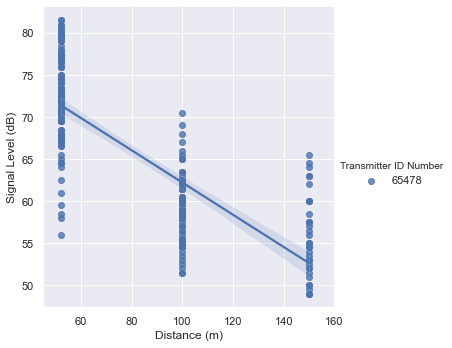

In [59]:
# Plot using Seaborn
sns.lmplot(x='Distance (m)', y='Signal Level (dB)', fit_reg=True, data=df_clean, hue='Transmitter ID Number')
 
# Tweak using Matplotlib
plt.ylim(None, None)
plt.xlim(45, 160)
plt.savefig("long_beach_signal_plot.png")

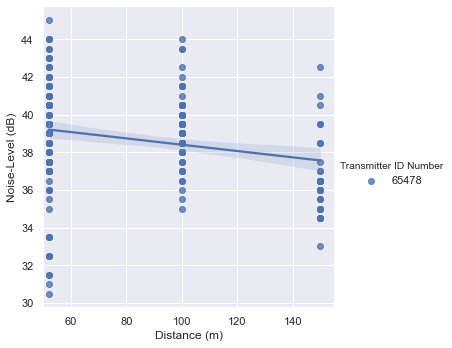

In [60]:
# Plot using Seaborn
sns.lmplot(x='Distance (m)', y='Noise-Level (dB)', fit_reg = True, data=df_clean, hue='Transmitter ID Number')
 
# Tweak using Matplotlib
plt.ylim(None, None)
plt.xlim(50, 155)
plt.savefig('long_beach_noise_plot.png')